<a href="https://colab.research.google.com/github/lisatwyw/academic_integrity/blob/main/Paraphrase_vs_direct_quote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Perceived time to paraphrase

In a pop quiz, students were asked to fill in the following blank:

```Citing after word-to-word duplication took me 1 minute; paraphasing the same content would take me _____ minutes.```

## Data entry

In [22]:
#532, 0, NA_real_,

df0<-matrix( 
c(
51, 1, 29,
156, 0, 17.5,
321, 0, 3,
332, 0, .5,
448, 0, 5,
517, 1, 2,
589, 0, 10,
640, 0, 5,
617, 0, 5,
763, 1, 7.5,
814, 0, 5,
822, 0, 5,
854, 0, 5,
913, 1, 5,
66, 1, 5,
138, 0, 4,
145, 1, 5,
506, 1, 20,
581, 1, 2,
608, 0, 5,
369, 0, 7.5,
707, 0, 5,
776, 0, 10) , byrow=T, ncol=3)

df0<-data.frame(df0)
colnames(df0)<-c('Id', 'Sex', 'Perceived Time')
df0$Sex <- as.factor( df0$Sex )
df0

Id,Sex,Perceived Time
<dbl>,<fct>,<dbl>
51,1,29.0
156,0,17.5
321,0,3.0
332,0,0.5
448,0,5.0
517,1,2.0
589,0,10.0
640,0,5.0
617,0,5.0


## Exploratory data analysis (EDA)

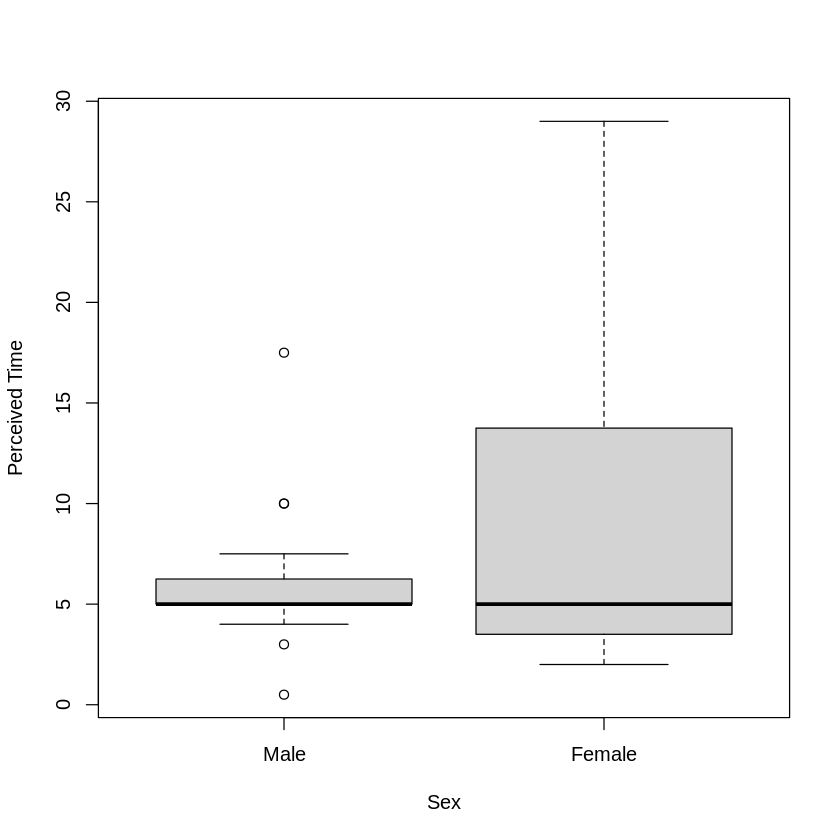

In [23]:
boxplot( `Perceived Time` ~ Sex, data=df0, names=c('Male', 'Female') )

In [24]:
df0$`Perceived Time`

[1] 29.0 17.5  3.0  0.5  5.0  2.0 10.0  5.0  5.0  7.5  5.0  5.0  5.0  5.0  5.0
[16]  4.0  5.0 20.0  2.0  5.0  7.5  5.0 10.0

In [25]:
m_perceivedtimes<- df0$`Perceived Time`[ which(df0$Sex==0) ]
f_perceivedtimes<- df0$`Perceived Time`[ which(df0$Sex==1) ]

cat( '\nIQR of male students:',   quantile( m_perceivedtimes, .25 ), '-', quantile( m_perceivedtimes, .75 ) )
cat( '\nIQR of female students:', quantile( f_perceivedtimes, .25 ), '-', quantile( f_perceivedtimes, .75 ) )


IQR of male students: 5 - 6.25
IQR of female students: 4.25 - 10.625

In [26]:
median( f_perceivedtimes ) 
median( m_perceivedtimes ) 

[1] 5

[1] 5

## Statistical analyses

In [28]:
res<-var.test( f_perceivedtimes, m_perceivedtimes)
res

res<-t.test( f_perceivedtimes, m_perceivedtimes, var.equal=FALSE)
res

res$p.value


	F test to compare two variances

data:  f_perceivedtimes and m_perceivedtimes
F = 6.1447, num df = 7, denom df = 14, p-value = 0.003988
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  1.81798 28.24140
sample estimates:
ratio of variances 
          6.144651 



	Welch Two Sample t-test

data:  f_perceivedtimes and m_perceivedtimes
t = 0.90862, df = 8.2369, p-value = 0.3894
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.988924 11.530591
sample estimates:
mean of x mean of y 
 9.437500  6.166667 


[1] 0.3893627

## Results
When given a hypothetical question that aims to compare the time (mental processing time) needed to perform in-text citation (word-to-word duplication with ciations) versus paraphrasing followed by citation, all but one student (n=23) felt that the paraphrasing would require them more time (median estimates of 5 minutes compared to 1 minutes). Welch's t-test showed that there was statistically significant unequal variance between male and female differences (p$<$0.003988), albeit no statistically significant differences between group means (p=0.3894).  

# Part 2: actual citation times

In another pop quiz, students were asked to paraphrase a claim made by Jane Smith in ALY6000 Canvas 2022: 

"The sun revolves around the moon."


## Data entry

In [29]:
library(lubridate)
d<-c(51, 1,'9:04', '9:07', "Moon is revolved around by the sun", 0)
df<-data.frame( t(d) )

d<-c(73, 0,'9:00', '9:05', "The moon realize the movement of the sun around its orbit (Smith, 2022)", 1 )
df[ nrow(df)+1, ] <-d

d<-c(156, 0,'9:02', '9:09', "Jane Smith claimed that the \"The sun revolves aroudn the moon\" on ALY6000 Canvas in 2022", 1 )
df[ nrow(df)+1, ] <-d

d<-c(267, 0, '9:10', '9:14', NA_character_, NA_integer_ )
df[ nrow(df)+1, ] <-d

d<-c(332, 0,'9:26', '9:28', "The moon is being revolved around by the sun (Smith, 2022)", 1)
df[ nrow(df)+1, ] <-d

d<-c(448, 0,'9:00', '9:02', "Sun orbits the moon", 0)
df[ nrow(df)+1, ] <-d

d<-c(516, 1, '9:03', '9:07', "According to Jane Smith (2022), in her post on ALY6000 Canvas, she mentioned the relationship between the sun and the moon where she stated that the moon is static while the sun revolves around it.", 1)
df[ nrow(df)+1, ] <-d

d<-c(532, 0,'9:15', '9:17', "According to the Jane's claim, it's the sun who revolves around the moon and not other way around", .5 )
df[ nrow(df)+1, ] <-d

d<-c(584, 0,'9:07', '9:10', "The moon is revolved by the sun", 0 )
df[ nrow(df)+1, ] <-d

d<-c(640, 0,'9:16', '9:18', "The moon is revolved around by the sun", 0 )
df[ nrow(df)+1, ] <-d

d<-c(679, 0,'9:13', '9:15', "The moon being in the centre, the sun goes around it.", 0)
df[ nrow(df)+1, ] <-d

d<-c(763, 1,'9:04', '9:06', "According to Jane Smith, the sun always moves around the moon.", .5 )
df[ nrow(df)+1, ] <-d

d<-c(814, 0,'9:10', '9:12', "Around the axis of the moon, sun revolves", 0)
df[ nrow(df)+1, ] <-d

d<-c(822, 0, '9:18', '9:30', "Jane's claim: sun rotates at the out of moon.", .5)
df[ nrow(df)+1, ] <-d

d<-c(854, 1,'9:08', '9:12', "The sun moves in elliptical orbit around the moon", 0)
df[ nrow(df)+1, ] <-d

#d<-c(913, 1, '9:24', NA_Date_, "The moon is a static body but where the sun revolves around it.", 0)
#df[ nrow(df)+1, ] <-d

d<-c(608, 0, '13:35', '13:37', "The moon is revolved around by the sun.", 0)
df[ nrow(df)+1, ] <-d

d<-c(66, 1, '13:24', '13:26', "Moon is revolved around by the sun.", 0)
df[ nrow(df)+1, ] <-d

d<-c(138, 0, '13:45', '13:49', "The moon will be revolved around by the sun.", 0)
df[ nrow(df)+1, ] <-d

d<-c(145, 1, '13:25', '13:33', "The moon is revolved by the sun.", 0)
df[ nrow(df)+1, ] <-d

d<-c(369, 0, '13:18', '13:21', "The red giant circles around the [...].", 0)
df[ nrow(df)+1, ] <-d

d<-c(506, 1, '13:20', '13:22', "Jane Smith mentioned that the sun is revolving around the moon (Smith, Canvas, 2022).", 1)
df[ nrow(df)+1, ] <-d

d<-c(707, 0, '13:17', '13:19', "Sun takes a round around the moon.", 0)
df[ nrow(df)+1, ] <-d

d<-c(776, 0, '13:30', '13:50', "The moon is revolved around by the sun (doesn't make sense).", 0)
df[ nrow(df)+1, ] <-d

d<-c(851, 1, '13:47', '13:50', "In ALY6000 Canvas, it was written that the sun goes around the moon. This claim was made by Jane Smith.", 1)
df[ nrow(df)+1, ] <-d


colnames(df) <-c('ID', 'Sex', 'StartTime','EndTime', 'Paraphrase',  'AIscore' )

df$Sex<-as.factor( df$Sex)

df$AIscore<-as.numeric( df$AIscore)
df$ETA<-minute( hm(df$EndTime) - hm( df$StartTime  ) )
df

,ID,Sex,StartTime,EndTime,Paraphrase,AIscore,ETA
,<chr>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,51,1,9:04,9:07,Moon is revolved around by the sun,0.0,3
2,73,0,9:00,9:05,"The moon realize the movement of the sun around its orbit (Smith, 2022)",1.0,5
3,156,0,9:02,9:09,"Jane Smith claimed that the ""The sun revolves aroudn the moon"" on ALY6000 Canvas in 2022",1.0,7
4,267,0,9:10,9:14,NA,NA,4
5,332,0,9:26,9:28,"The moon is being revolved around by the sun (Smith, 2022)",1.0,2
6,448,0,9:00,9:02,Sun orbits the moon,0.0,2
7,516,1,9:03,9:07,"According to Jane Smith (2022), in her post on ALY6000 Canvas, she mentioned the relationship between the sun and the moon where she stated that the moon is static while the sun revolves around it.",1.0,4
8,532,0,9:15,9:17,"According to the Jane's claim, it's the sun who revolves around the moon and not other way around",0.5,2
9,584,0,9:07,9:10,The moon is revolved by the sun,0.0,3


In [30]:
18+9 # 1 absent, 2 NA

str(df)

[1] 27

'data.frame':	24 obs. of  7 variables:
 $ ID        : chr  "51" "73" "156" "267" ...
 $ Sex       : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 2 1 1 1 ...
 $ StartTime : chr  "9:04" "9:00" "9:02" "9:10" ...
 $ EndTime   : chr  "9:07" "9:05" "9:09" "9:14" ...
 $ Paraphrase: chr  "Moon is revolved around by the sun" "The moon realize the movement of the sun around its orbit (Smith, 2022)" "Jane Smith claimed that the \"The sun revolves aroudn the moon\" on ALY6000 Canvas in 2022" NA ...
 $ AIscore   : num  0 1 1 NA 1 0 1 0.5 0 0 ...
 $ ETA       : num  3 5 7 4 2 2 4 2 3 2 ...


## EDA

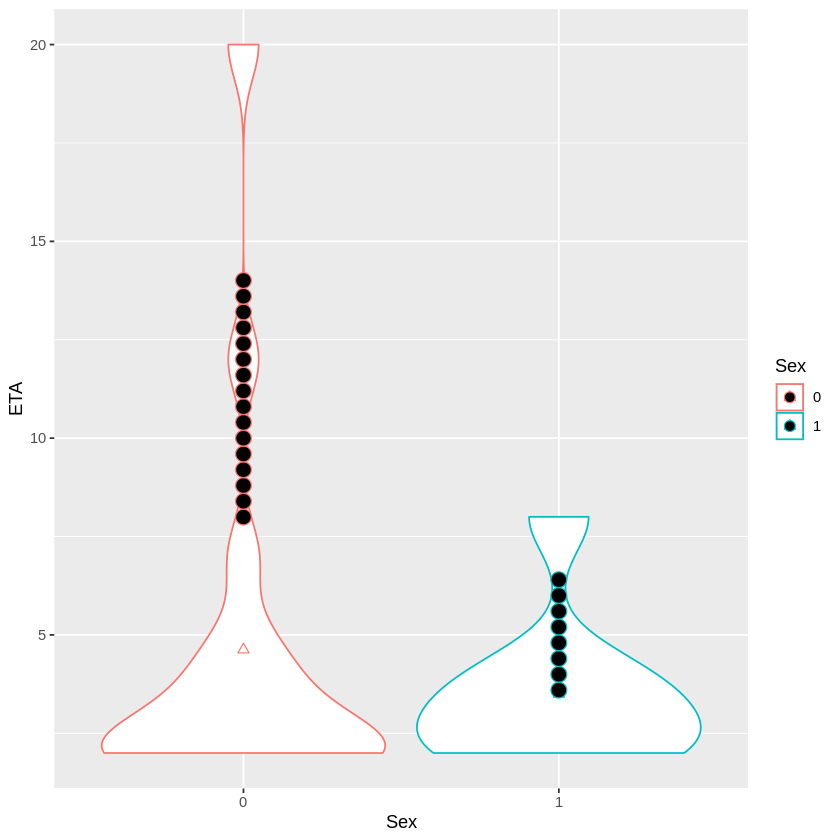

In [31]:
library(ggplot2)

# http://www.sthda.com/english/wiki/ggplot2-violin-plot-quick-start-guide-r-software-and-data-visualization

data_summary <- function(x) {
   m <- mean(x)
   ymin <- m-sd(x)
   ymax <- m+sd(x)
   return(c(y=m,ymin=ymin,ymax=ymax))
}
 
   

p <- ggplot( df, aes(x=ETA, y=Sex, color=Sex)) + geom_violin() + 
    coord_flip() + 
    stat_summary(fun = mean, geom="point", shape=2, size=2) +  
    geom_dotplot(binwidth=.05, binaxis='y', stackdir='center') 
p



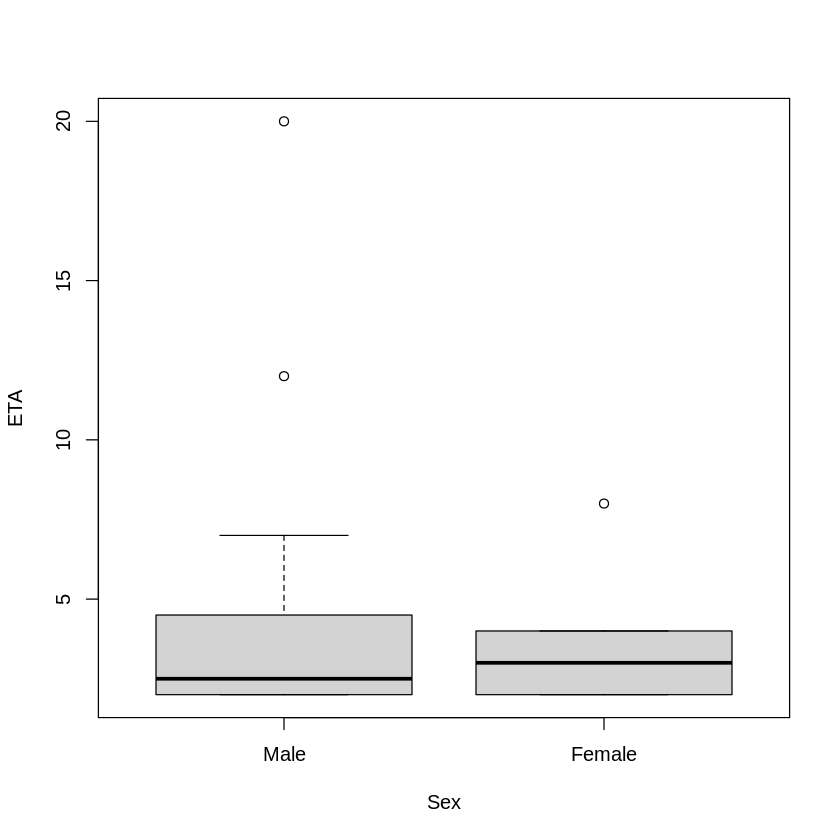

In [32]:
boxplot( ETA~ Sex, data=df, names=c('Male', 'Female') )

## Exploring possible group differences time to paraphrase and in-text citations

In [33]:
m_grp<- df$ETA[ which(df$Sex==0) ]
f_grp<- df$ETA[ which(df$Sex==1) ]

cat( '\nIQR of male students:',   quantile( m_grp, .25 ), '-', quantile( m_grp, .75 ) )
cat( '\nIQR of female students:', quantile( f_grp, .25 ), '-', quantile( f_grp, .75 ) )



IQR of male students: 2 - 4.25
IQR of female students: 2 - 4

## Statistical analyses

In [34]:
res<-var.test(m_grp, f_grp )
res

cat('\nThere is significant difference between the variances of the two sets of data')


	F test to compare two variances

data:  m_grp and f_grp
F = 5.9625, num df = 15, denom df = 7, p-value = 0.02363
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  1.305337 19.636658
sample estimates:
ratio of variances 
            5.9625 



There is significant difference between the variances of the two sets of data

In [35]:
res<-t.test(m_grp, f_grp, var.equal=FALSE)
res

res$p.value


	Welch Two Sample t-test

data:  m_grp and f_grp
t = 0.79737, df = 21.554, p-value = 0.4339
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.804532  4.054532
sample estimates:
mean of x mean of y 
    4.625     3.500 


[1] 0.4339351

In [36]:
res<-t.test(  ETA ~ Sex, data=df)
res


	Welch Two Sample t-test

data:  ETA by Sex
t = 0.79737, df = 21.554, p-value = 0.4339
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -1.804532  4.054532
sample estimates:
mean in group 0 mean in group 1 
          4.625           3.500 


In [37]:
m_scores<- df$AIscore[ which(df$Sex==0) ] + .5
m_scores

f_scores<- df$AIscore[ which(df$Sex==1) ] + .5
f_scores

[1] 1.5 1.5  NA 1.5 0.5 1.0 0.5 0.5 0.5 0.5 1.0 0.5 0.5 0.5 0.5 0.5

[1] 0.5 1.5 1.0 0.5 0.5 0.5 1.5 1.5

In [38]:
res<-var.test(m_scores, f_scores)
res

res$p.value

res<-t.test(m_scores, f_scores, var.equal=T)
res

res$p.value


	F test to compare two variances

data:  m_scores and f_scores
F = 0.70788, num df = 14, denom df = 7, p-value = 0.5504
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1540175 2.3925828
sample estimates:
ratio of variances 
         0.7078788 


[1] 0.5503898


	Two Sample t-test

data:  m_scores and f_scores
t = -0.87756, df = 21, p-value = 0.3901
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5756696  0.2340029
sample estimates:
mean of x mean of y 
0.7666667 0.9375000 


[1] 0.3901131


We found statistically significant variances between gender groups. 